# Public response to ChatGPT:
### Measuring public opinion and reactions based on tweets from the first month after ChatGPT's launch


- Leslie Cohrt: data preprocessing, writing results, graph customization
- Sarah Auther: data preprocessing, sentiment analysis, code formatting 
- Shoshana Medved: formulating research questions, introduction, project organization
- Rani Adikarjo: analysis, data visualization 

## Introduction

In this study, we aim to understand how people spoke about ChatGPT on Twitter during the first month of its launch. Through this project, we hope to pinpoint any key differences in responses as ChatGPT became more mainstream. By analyzing a data sample of over 200,000 tweets from November 30th to December 31st, 2022, we will be able to search for key communication trends among users and recurring beliefs about ChatGPT as an emerging platform. 

We are interested in discovering how people view ChatGPT based on data from Twitter.

### Research Questions:
- Throughout the first month of its launch, how have Twitter users’ perceptions of and discussion about ChatGPT evolved?  
- Among tweets about ChatGPT, what trends exist that correlate with greater interaction?

## Dataset Description

To delve into our research questions regarding the perception of ChatGPT in its early days of use, we employed cutting-edge data from Kaggle that collected all 200,000+ tweets mentioning ChatGPT in its first month of launch (November 30th, 2022 to December 31st, 2022). All tweets were gathered via Twitter API for Academic Research. Our initial dataset offered eleven different columns for tweets to be categorized by: 

- Tweet ID
- Time of creation
- Number of likes
- Number of quote Tweets
- Number of replies
- Number of Retweets
- Tweet’s word content
- Country of origin 
- Any photo URL
- Its city location 
- Its country code

In [23]:
import pandas as pd

df = pd.read_csv("chatgpt.data.csv")
df.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,country,photo_url,city,country_code
0,1.598010e+18,2022-11-30 18:00:15+00:00,2,0,0,0,ChatGPT: Optimizing Language Models for Dialog...,NaN,NaN,NaN,NaN
1,1.598010e+18,2022-11-30 18:02:06+00:00,12179,889,1130,3252,"Try talking with ChatGPT, our new AI system wh...",NaN,NaN,NaN,NaN
2,1.598010e+18,2022-11-30 18:02:58+00:00,2,0,0,1,ChatGPT: Optimizing Language Models for Dialog...,NaN,https://pbs.twimg.com/media/Fi1J8HbWAAMv_yi.jpg,NaN,NaN
3,1.598020e+18,2022-11-30 18:05:58+00:00,561,8,25,66,"THRILLED to share that ChatGPT, our new model ...",NaN,https://pbs.twimg.com/media/Fi1Km3WUYAAfzHS.jpg,NaN,NaN
4,1.598020e+18,2022-11-30 18:06:01+00:00,1,0,0,0,"As of 2 minutes ago, @OpenAI released their ne...",NaN,NaN,NaN,NaN


In [24]:
df.describe()

,tweet_id,like_count,quote_count,reply_count,retweet_count
count,2.192940e+05,219294.000000,219294.000000,219294.000000,219294.000000
mean,1.602573e+18,16.827423,0.403253,1.230412,2.296725
std,3.020433e+15,487.831192,14.095652,25.448931,63.453391
min,1.598010e+18,0.000000,0.000000,0.000000,0.000000
25%,1.600100e+18,0.000000,0.000000,0.000000,0.000000
50%,1.601760e+18,1.000000,0.000000,0.000000,0.000000
75%,1.604880e+18,3.000000,0.000000,1.000000,0.000000
max,1.609340e+18,119321.000000,4598.000000,5184.000000,10593.000000


When looking at our statistical description, we can see that collectively all tweets about ChatGPT received over 219,000 likes and 219,000 Retweets, with an identically high number for our other columns. However, 75% of tweets received 3 likes or below and the average amount of likes was just 17. When it came to other columns, we saw similarly low numbers across the board for means (quote count at .4, reply count at 1.2, and retweet count at 2.3). These statistics are highly interesting to take note of, suggesting that our data is heavily skewed to certain well-performing tweets. Our standard deviation would certainly back this up, with an extremely large deviation of 487 in the like count column. <a href="https://twitter.com/stats_feed/status/1600712751550431232?lang=en">One tweet in particular</a> captured the lion's share of attention with over 116,000 likes and serves as our dataset’s maximum. 

## Preprocessing

In [86]:
import numpy as np

df1 = df.fillna(value=0)
df1 = df1.loc[df1["like_count"] != 0]
df1 = df1.drop(columns=['country', 'photo_url', 'city', 'country_code'])

df1.describe()

,tweet_id,like_count,quote_count,reply_count,retweet_count
count,1.201360e+05,120136.000000,120136.000000,120136.000000,120136.000000
mean,1.602453e+18,30.716463,0.716072,2.120688,4.155083
std,2.985152e+15,658.769995,19.037848,34.355344,85.684421
min,1.598010e+18,1.000000,0.000000,0.000000,0.000000
25%,1.600020e+18,1.000000,0.000000,0.000000,0.000000
50%,1.601650e+18,2.000000,0.000000,0.000000,0.000000
75%,1.604640e+18,6.000000,0.000000,1.000000,1.000000
max,1.609340e+18,119321.000000,4598.000000,5184.000000,10593.000000


Not all columns in the dataframe were relevant to our research questions, so we removed the columns about country of origin, photo URLs, cities, and country codes, which were already missing a majority of values. We also dropped all tweets with 0 likes to remove spam and ensure that we were working with shared sentiment and interactions. This cut the number of tweets in our data set in half from about 200,000 to about 100,000.

In [98]:
df1.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,sentiment
0,1.598010e+18,2022-11-30 18:00:15+00:00,2,0,0,0,ChatGPT: Optimizing Language Models Dialogue h...,0.4588
1,1.598010e+18,2022-11-30 18:02:06+00:00,12179,889,1130,3252,"Try talking ChatGPT, new AI system optimized d...",0.8225
2,1.598010e+18,2022-11-30 18:02:58+00:00,2,0,0,1,ChatGPT: Optimizing Language Models Dialogue h...,0.4588
3,1.598020e+18,2022-11-30 18:05:58+00:00,561,8,25,66,"THRILLED share ChatGPT, new model optimized di...",0.9029
4,1.598020e+18,2022-11-30 18:06:01+00:00,1,0,0,0,"2 minutes ago, @OpenAI released new ChatGPT. \...",0.0000


In [87]:
!pip install nltk

import nltk

nltk.download('vader_lexicon')

nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

!pip install textblob
from textblob import TextBlob

import re

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
# Word tokenization    
text = df1['tweet'].apply(word_tokenize)

In [89]:
print(text)

0         [ChatGPT, :, Optimizing, Language, Models, for...
1         [Try, talking, with, ChatGPT, ,, our, new, AI,...
2         [ChatGPT, :, Optimizing, Language, Models, for...
3         [THRILLED, to, share, that, ChatGPT, ,, our, n...
4         [As, of, 2, minutes, ago, ,, @, OpenAI, releas...
                                ...                        
219287    [One, of, my, new, favorite, thing, to, do, wi...
219288    [Sounds, like, AI, ca, n't, predict, 2023, tre...
219290    [I, asked, #, ChatGPT, to, write, a, #, NYE, J...
219291    [chatgpt, is, being, disassembled, until, it, ...
219292    [2023, predictions, by, #, chatGPT, ., Nothing...
Name: tweet, Length: 120136, dtype: object


In [90]:
import string

In [91]:
# removing stop words

stop_words = set(stopwords.words('english'))

for column in df1.columns:
    if df1[column].dtype == 'object': # check if the column contains text data
        df1[column] = df1[column].apply(lambda x: ' '.join([word for word in str(x).split() if word.lower() not in stop_words]))

We tokenized the tweets and removed stopwords, which are commonly used and insignificant words so that our analyses would not be cluttered by them.

In [92]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [108]:
# sentiment analysis
def get_sentiment(tweet):
    sentiment = sid.polarity_scores(tweet)
    return sentiment['compound']
  
#adding a column for sentiment scores
df1['sentiment'] = df1['tweet'].apply(get_sentiment)

In [94]:
df1['sentiment']

0         0.4588
1         0.8225
2         0.4588
3         0.9029
4         0.0000
           ...  
219287    0.8481
219288    0.3612
219290    0.6360
219291    0.0000
219292    0.0000
Name: sentiment, Length: 120136, dtype: float64

In [95]:
df1.describe()

,tweet_id,like_count,quote_count,reply_count,retweet_count,sentiment
count,1.201360e+05,120136.000000,120136.000000,120136.000000,120136.000000,120136.000000
mean,1.602453e+18,30.716463,0.716072,2.120688,4.155083,0.206922
std,2.985152e+15,658.769995,19.037848,34.355344,85.684421,0.406783
min,1.598010e+18,1.000000,0.000000,0.000000,0.000000,-0.967400
25%,1.600020e+18,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.601650e+18,2.000000,0.000000,0.000000,0.000000,0.128000
75%,1.604640e+18,6.000000,0.000000,1.000000,1.000000,0.542300
max,1.609340e+18,119321.000000,4598.000000,5184.000000,10593.000000,0.990200


In [96]:
postive_tweets = df1[df1['sentiment'] > 0]
negative_tweets = df1[df1['sentiment'] < 0]
neutral_tweets = df1[df1['sentiment'] == 0]

postive_percentage = len(postive_tweets) / len(df1) * 100
negative_percentage = len(negative_tweets) / len(df1) * 100
neutral_percentage = len(neutral_tweets) / len(df1) * 100

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

We ran Sentiment Analysis and inserted the sentiment scores into our dataframe so that we can work with the scores to answer our research questions.

## Analyses and Visualizations

### RQ1: Throughout the first month of its launch, how have Twitter users’ perceptions of ChatGPT and discussion about ChatGPT evolved?

In [109]:
df1.sort_values(by=['created_at'], ascending=True, inplace=True)

df1.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,sentiment
0,1.598010e+18,2022-11-30 18:00:15+00:00,2,0,0,0,ChatGPT: Optimizing Language Models Dialogue h...,0.4588
1,1.598010e+18,2022-11-30 18:02:06+00:00,12179,889,1130,3252,"Try talking ChatGPT, new AI system optimized d...",0.8225
2,1.598010e+18,2022-11-30 18:02:58+00:00,2,0,0,1,ChatGPT: Optimizing Language Models Dialogue h...,0.4588
3,1.598020e+18,2022-11-30 18:05:58+00:00,561,8,25,66,"THRILLED share ChatGPT, new model optimized di...",0.9029
4,1.598020e+18,2022-11-30 18:06:01+00:00,1,0,0,0,"2 minutes ago, @OpenAI released new ChatGPT. \...",0.0000


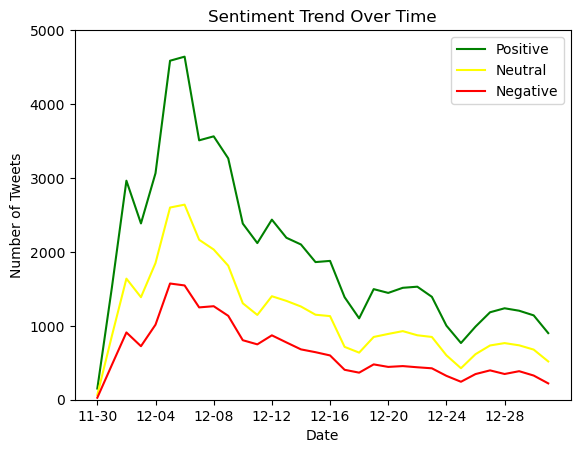

In [100]:
#Create dictionaries to store the number of positive, negative, and neutral sentiments for each day
pos_dict = {}
neutral_dict = {}
neg_dict = {}
dates = []

#Loop through entries in the dataframe to get a date string
for index, row in df1.iterrows():
    date = row['created_at'].split()[0][5:] #Use the split function to split the date from the time #To focus just on the date

#Inputting information from the dataframe into the dictionaries
    if date not in dates:
        dates.append(date)
        
#Sum the number of positive sentiment each day
    if row['sentiment'] > 0:
        if date in pos_dict:
            pos_dict[date] += 1
        else:
            pos_dict[date] = 1
            
#Sum the number of negative sentiment each day
    elif row['sentiment'] < 0:
        if date in neg_dict:
            neg_dict[date] += 1
        else:
            neg_dict[date] = 1
    else:

#Sum the number of neutral each day
        if date in neutral_dict:
            neutral_dict[date] += 1
        else:
            neutral_dict[date] = 1

#Fill in empty dates
for date in dates:
    if date not in pos_dict:
        pos_dict[date] = 0
    if date not in neutral_dict:
        neutral_dict[date] = 0
    if date not in neg_dict:
        neg_dict[date] = 0

#Retrieving the values from the dictionaries
pos = list(pos_dict.values())
neutral = list(neutral_dict.values())
neg = list(neg_dict.values())

#Plot the values from the dictionaries into the graph
plt.plot(dates, pos, label = 'Positive', color='green')
plt.plot(dates, neutral, label = 'Neutral', color='yellow')
plt.plot(dates, neg, label = 'Negative', color='red')

#Create the labels and titles in the graph
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Trend Over Time')

#Creating the limits in the graphs for the x-axis and y-axis in order to most efficiently show the trend
plt.xticks(dates[::4])
plt.ylim(0, 5000)

plt.legend()
plt.show()

The graph shows that, although the amount of tweets about ChatGPT dropped as time went on, there were more positive tweets than either neutral or negative. Neutral tweets were the next most common, with negative tweets accounting for the least amount of tweets about ChatGPT. This suggests that public opinion of ChatGPT tended to be positive.

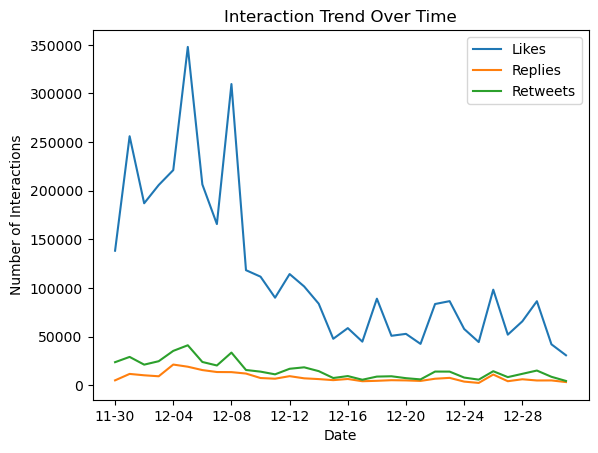

In [101]:
#Create dictionaries to store the number of likes, replies, and retweets for each day
like_dict = {}
reply_dict = {}
rt_dict = {}

#Loop through entries in the dataframe to get a date string
for index, row in df1.iterrows():
    date = row['created_at'].split()[0][5:] #Use the split function to split the date from the time

#Inputting information from the dataframe into the dictionaries
    if date in like_dict:
        like_dict[date] += row['like_count'] #Sum up the likes for each date
    else:
        like_dict[date] = row['like_count']
    if date in reply_dict:
        reply_dict[date] += row['reply_count'] #Sum up the replies for each date
    else:
        reply_dict[date] = row['reply_count']
    if date in rt_dict:
        rt_dict[date] += row['retweet_count'] #Sum up the retweets for each date
    else:
        rt_dict[date] = row['retweet_count']

#Retrieving the values from the dictionaries
dates = list(like_dict.keys())
likes = list(like_dict.values())
replies = list(reply_dict.values())
retweets = list(rt_dict.values())

#Plotting the values obtained from the dictionaries into the graph
plt.plot(dates, likes, label = 'Likes')
plt.plot(dates, replies, label = 'Replies')
plt.plot(dates, retweets, label = 'Retweets')

#Creating the labels and titles of the graph
plt.xlabel('Date')
plt.ylabel('Number of Interactions')
plt.title('Interaction Trend Over Time')
plt.xticks(dates[::4]) #Fixing the labeling in the x-axis to make it more legible

plt.legend()
plt.show()

Tweets published in the initial days of launch for ChatGPT received significantly higher like counts than those published later in the month. Although retweets saw a small spike in correlation with like count, replies stayed consistently low throughout the month-long period. 

### RQ2: Among tweets about ChatGPT, what trends exist that correlate with greater interaction?

We are basing measure of interaction on the tweets with the most likes, replies, retweets, and quotes.

In [102]:
df_r2 = df1.loc[(df1["like_count"] >299) & (df1["reply_count"] >49) & (df1["retweet_count"] >49) & (df1["quote_count"] >24)]

df_r2.describe()

,tweet_id,like_count,quote_count,reply_count,retweet_count,sentiment
count,2.500000e+02,250.000000,250.000000,250.000000,250.000000,250.000000
mean,1.601852e+18,7658.344000,194.260000,315.696000,1052.952000,0.206099
std,3.320418e+15,12128.445301,368.221374,659.398603,1525.524037,0.409143
min,1.598010e+18,360.000000,26.000000,50.000000,54.000000,-0.831600
25%,1.599230e+18,2130.750000,43.000000,79.000000,260.000000,0.000000
50%,1.600480e+18,4072.000000,88.000000,136.500000,520.000000,0.089950
75%,1.604585e+18,7524.750000,186.750000,243.750000,1116.000000,0.557400
max,1.609240e+18,119321.000000,4598.000000,5184.000000,10593.000000,0.945100


We have pulled the 250 tweets with the most reactions.

In [103]:
postive_top_tweets = df_r2[df_r2['sentiment'] > 0]
negative_top_tweets = df_r2[df_r2['sentiment'] < 0]
neutral_top_tweets = df_r2[df_r2['sentiment'] == 0]

postive_percentage_top = len(postive_top_tweets) / len(df_r2) * 100
negative_percentage_top = len(negative_top_tweets) / len(df_r2) * 100
neutral_percentage_top = len(neutral_top_tweets) / len(df_r2) * 100

In [104]:
df_r2

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,sentiment
1,1.598010e+18,2022-11-30 18:02:06+00:00,12179,889,1130,3252,"Try talking ChatGPT, new AI system optimized d...",0.8225
5,1.598020e+18,2022-11-30 18:06:29+00:00,2376,72,85,372,"launched ChatGPT, new AI system optimized dial...",0.5423
36,1.598020e+18,2022-11-30 18:26:58+00:00,23201,827,477,4024,OK @OpenAI's new #ChatGPT basically generate #...,0.5904
39,1.598020e+18,2022-11-30 18:29:47+00:00,26835,1142,898,4108,Google done.\n\nCompare quality responses (Cha...,0.0000
60,1.598030e+18,2022-11-30 19:06:41+00:00,3527,80,68,556,"OpenAI released ChatGPT. Damn, good. might GPT...",0.0516
...,...,...,...,...,...,...,...,...
212398,1.608690e+18,2022-12-30 05:02:57+00:00,3192,168,145,621,#ChatGPT video via #stablediffusion AI tools. ...,0.0000
212957,1.608750e+18,2022-12-30 09:14:29+00:00,4347,98,93,1098,📢 New #ChatGPT extension!\n\n`ChatGPT Writer` ...,0.0000
217074,1.609110e+18,2022-12-31 08:45:13+00:00,3165,72,485,113,"write ""thank you"" ChatGPT helps you? got idea ...",0.6249
217654,1.609170e+18,2022-12-31 12:35:14+00:00,2258,76,682,249,"code bug, go first?\n\n1. Google\n2. StackOver...",-0.4767


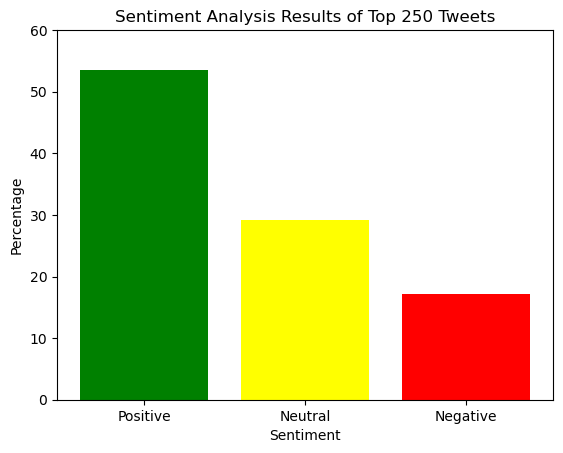

In [105]:
sentiment_labels_2 = ['Positive', 'Neutral', 'Negative']
sentiment_percentages_2 = [postive_percentage_top, neutral_percentage_top, negative_percentage_top]

plt.bar(sentiment_labels_2, sentiment_percentages_2, color = ('green','yellow','red'))
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Sentiment Analysis Results of Top 250 Tweets')
plt.ylim(0, 60)

plt.show()

The graph shows that of the top tweets, there were more positive tweets than any other sentiment. Neutral had the next greatest amound, and negative the least. This matches the breakdown of sentiments in the larger dataset, as demonstrated above, which suggests that sentiment is not what determines tweet interaction.

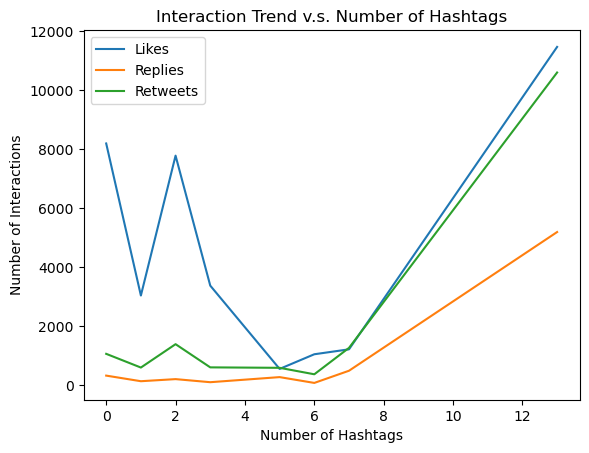

In [106]:
#Create dictionaries to store the number of likes, replies, and retweets for each tweets with certain number of hashtags
like_dict_ht = {}
reply_dict_ht = {}
rt_dict_ht = {}
count_dict_ht = {}

#Loop through entries in the dataframe to find the number of hashtags in a tweet
for index, row in df_r2.iterrows():
    num_ht = row['tweet'].count('#')

#Inputting information from the dataframe into the dictionaries
    if num_ht in like_dict_ht:
        like_dict_ht[num_ht] += row['like_count'] #Sum the number of likes in tweets for each number of hashtag
    else:
        like_dict_ht[num_ht] = row['like_count']
    if num_ht in reply_dict_ht:
        reply_dict_ht[num_ht] += row['reply_count'] #Sum the number of replies in tweets for each number of hashtag
    else:
        reply_dict_ht[num_ht] = row['reply_count']
    if num_ht in rt_dict_ht:
        rt_dict_ht[num_ht] += row['retweet_count'] #Sum the number of retweet in tweets for each number of hashtag
    else:
        rt_dict_ht[num_ht] = row['retweet_count']

#Count of occurrences
    if num_ht in count_dict_ht:
        count_dict_ht[num_ht] += 1
    else:
        count_dict_ht[num_ht] = 1

#Divide it by the count of occurrences to get the mean
for key in like_dict_ht:
    like_dict_ht[key] /= count_dict_ht[key]
    reply_dict_ht[key] /= count_dict_ht[key]
    rt_dict_ht[key] /= count_dict_ht[key]

#Retrieving the needed values from the dictionaries
like_dict_ht = dict(sorted(like_dict_ht.items()))
reply_dict_ht = dict(sorted(reply_dict_ht.items()))
rt_dict_ht = dict(sorted(rt_dict_ht.items()))
    
hashtags = list(like_dict_ht.keys())
likes = list(like_dict_ht.values())
replies = list(reply_dict_ht.values())
retweets = list(rt_dict_ht.values())

#Plotting the values from the dictionaries into the graphs
plt.plot(hashtags, likes, label = 'Likes')
plt.plot(hashtags, replies, label = 'Replies')
plt.plot(hashtags, retweets, label = 'Retweets')

#Create labels and titles for the graphs
plt.xlabel('Number of Hashtags')
plt.ylabel('Number of Interactions')
plt.title('Interaction Trend v.s. Number of Hashtags')

plt.legend()
plt.show()

Replies and retweets were consistently low with fewer hashtags but saw a steady increase starting at 6 hashtags. Likes fluctuated more in smaller hashtag counts, but also saw a steady increase starting at 6 hashtags. This suggests a direct relationship between hashtags and interaction levels.

## Results

Our results showcased key trends throughout our dataset. The following are essential takeaways from our project.
It is important to note that our research was based on the cleaned dataset with the unliked tweets removed.

In answering Research Question 1: Throughout the first month of its launch, how have Twitter users’ perceptions of ChatGPT and discussion about ChatGPT evolved?

- There were more tweets with positive sentiment than with negative or neutral sentiment throughout the entire month.
- Tweets in the beginning of the month received significantly more likes than those later in the month.

In answering Research Question 2: Among tweets about ChatGPT, what trends exist that correlate with greater interaction?
- Sentiment analysis of the top 250 tweets was consistent with that of the full dataset, showing that sentiment does not necessarily correlate with interaction.
- The more hashtags employed among the top 250 Tweets, the more likely it would receive higher counts of likes, retweets, and replies.  